In [27]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [28]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_title_short']

1         Data Analyst
12        Data Analyst
18        Data Analyst
31        Data Analyst
34        Data Analyst
              ...     
785703    Data Analyst
785705    Data Analyst
785715    Data Analyst
785717    Data Analyst
785737    Data Analyst
Name: job_title_short, Length: 196075, dtype: object

In [29]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA['job_posted_month_no']

1          1
12        12
18        10
31        10
34         2
          ..
785703     1
785705     1
785715     3
785717     3
785737     3
Name: job_posted_month_no, Length: 196075, dtype: int32

In [30]:
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

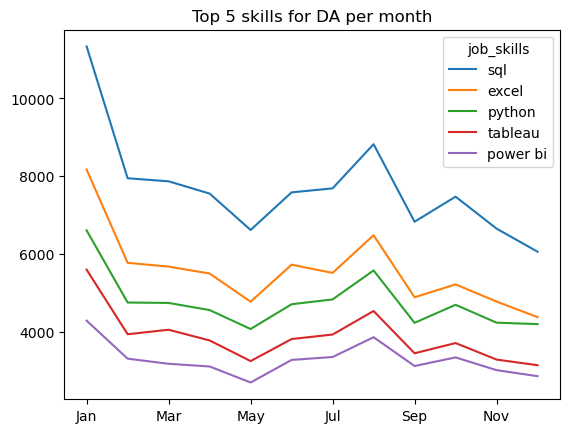

In [31]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for DA per month')
plt.xlabel('')
plt.show()